#### ASSIGNMENT - 2

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [3]:
# Load the dataset
file_path = "academics.csv" 
data = pd.read_csv(file_path)


In [4]:
# Check the first few rows
print(data.head())


  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Go

In [5]:
# Display data information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [6]:
# Check for missing values
data.isnull().sum()


gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [11]:
# Fill missing values in 'raisedhands' with mean
data['raisedhands'] = data['raisedhands'].fillna(data['raisedhands'].mean())


In [13]:
# Fill missing values in 'gender' with mode
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])


In [14]:
#check for missing values in dataset
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

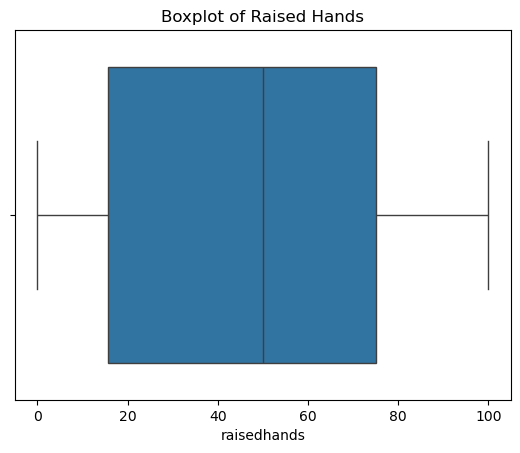

In [19]:
#Visualize Outliers
# Boxplot for 'raisedhands'
sns.boxplot(data ,x = 'raisedhands')
plt.title('Boxplot of Raised Hands')
plt.show()

In [20]:
#handle outliers
# Cap outliers using IQR (Interquartile Range)
Q1 = data['raisedhands'].quantile(0.25)
Q3 = data['raisedhands'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
# Cap values outside bounds
data['raisedhands'] = np.clip(data['raisedhands'], lower_bound, upper_bound)

In [22]:
# Apply PowerTransformer to 'raisedhands'
transformer = PowerTransformer(method='yeo-johnson')
data['raisedhands'] = transformer.fit_transform(data[['raisedhands']])

In [25]:
# Save the cleaned dataset to a CSV file
data.to_csv("cleaned_academics.csv", index=False)